In [25]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.preprocessing import Normalizer

In [3]:
preprocessed_data = pd.read_csv('data_preprocessed.csv')

In [5]:
preprocessed_data.shape
preprocessed_data.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,project_year_month
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,0,154.6,23,educational support for english learners at home,my students are english learners that are work...,my students need opportunities to practice beg...,16-12


# Splitting data into X & Y

In [6]:
y = preprocessed_data['project_is_approved'].values
x = preprocessed_data.drop(['project_is_approved'], axis=1)
x.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,project_year_month
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,154.6,23,educational support for english learners at home,my students are english learners that are work...,my students need opportunities to practice beg...,16-12


# Splitting data into Train & Test data (No need for sep. CV because we are doing N-fold Grid Search CV)

In [10]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.33, stratify=y)
print(y_tr.size)
print(y_te.size)
print(x_tr.shape)
print(x_te.shape)

73196
36052
(73196, 14)
(36052, 14)


# Vectorization - Essay, Project_title, Project Summary

In [11]:
#Essays vectorization using BOW
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(x_tr['preprocessed_essays'].values)

x_tr_essay_bow = vectorizer.transform(x_tr['preprocessed_essays'].values)
x_te_essay_bow = vectorizer.transform(x_te['preprocessed_essays'].values)

print(x_tr_essay_bow.shape, y_tr.shape)
print(x_te_essay_bow.shape, y_te.shape)

(73196, 512981) (73196,)
(36052, 512981) (36052,)


In [12]:
#Titles vectorization using BOW
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['preprocessed_titles'].values)

x_tr_title_bow = vectorizer.transform(x_tr['preprocessed_titles'].values)
x_te_title_bow = vectorizer.transform(x_te['preprocessed_titles'].values)

print(x_tr_title_bow.shape, y_tr.shape)
print(x_te_title_bow.shape, y_te.shape)

(73196, 14082) (73196,)
(36052, 14082) (36052,)


In [14]:
#Resource Summaries vectorization using BOW
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['preprocessed_res_summary'].values)

x_tr_res_summary_bow = vectorizer.transform(x_tr['preprocessed_res_summary'].values)
x_te_res_summary_bow = vectorizer.transform(x_te['preprocessed_res_summary'].values)

print(x_tr_res_summary_bow.shape, y_tr.shape)
print(x_te_res_summary_bow.shape, y_te.shape)

(73196, 18857) (73196,)
(36052, 18857) (36052,)


In [16]:
#One hot encoding of project_subject_categories
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['project_subject_categories'].values)

x_tr_subjects_ohe = vectorizer.transform(x_tr['project_subject_categories'].values)
x_te_subjects_ohe = vectorizer.transform(x_te['project_subject_categories'].values)

print(x_tr_subjects_ohe.shape, y_tr.shape)
print(x_te_subjects_ohe.shape, y_te.shape)

(73196, 11) (73196,)
(36052, 11) (36052,)


In [17]:
#One hot encoding of project_subject_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['project_subject_subcategories'].values)

x_tr_subject_subcat_ohe = vectorizer.transform(x_tr['project_subject_subcategories'].values)
x_te_subject_subcat_ohe = vectorizer.transform(x_te['project_subject_subcategories'].values)

print(x_tr_subject_subcat_ohe.shape, y_tr.shape)
print(x_te_subject_subcat_ohe.shape, y_te.shape)

(73196, 29) (73196,)
(36052, 29) (36052,)



# Vectorization of Categorical features

In [18]:
#One hot encoding of Teacher ids
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['teacher_id'].values)

x_tr_teacher_id_ohe = vectorizer.transform(x_tr['teacher_id'].values)
x_te_teacher_id_ohe = vectorizer.transform(x_te['teacher_id'].values)

print("After vectorizations")
print(x_tr_teacher_id_ohe.shape, y_tr.shape)
print(x_te_teacher_id_ohe.shape, y_te.shape)

After vectorizations
(73196, 52817) (73196,)
(36052, 52817) (36052,)


In [22]:
#One hot encoding of State codes
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['school_state'].values)

x_tr_state_ohe = vectorizer.transform(x_tr['school_state'].values)
x_te_state_ohe = vectorizer.transform(x_te['school_state'].values)

print(x_tr_state_ohe.shape, y_tr.shape)
print(x_te_state_ohe.shape, y_te.shape)

(73196, 51) (73196,)
(36052, 51) (36052,)


In [21]:
#One hot encoding of Teacher Prefixs
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['teacher_prefix'].values)

x_tr_tprefix_ohe = vectorizer.transform(x_tr['teacher_prefix'].values)
x_te_tprefix_ohe = vectorizer.transform(x_te['teacher_prefix'].values)

print(x_tr_tprefix_ohe.shape, y_tr.shape)
print(x_te_tprefix_ohe.shape, y_te.shape)

(73196, 5) (73196,)
(36052, 5) (36052,)


In [23]:
#One hot encoding of Grade categories
vectorizer = CountVectorizer()
vectorizer.fit(x_tr['project_grade_category'].values) # fit has to happen only on train data

x_tr_grade_ohe = vectorizer.transform(x_tr['project_grade_category'].values)
x_te_grade_ohe = vectorizer.transform(x_te['project_grade_category'].values)

print(x_tr_grade_ohe.shape, y_tr.shape)
print(x_te_grade_ohe.shape, y_te.shape)

(73196, 4) (73196,)
(36052, 4) (36052,)


# Normalization - Price, Quantity, Previous Projects, Word_counts

In [26]:
#Normalization of Project Prices
normalizer = Normalizer()
normalizer.fit(x_tr['price'].values.reshape(-1,1))

x_tr_price_norm = normalizer.transform(x_tr['price'].values.reshape(-1,1))
x_te_price_norm = normalizer.transform(x_te['price'].values.reshape(-1,1))

print(x_tr_price_norm.shape, y_tr.shape)
print(x_te_price_norm.shape, y_te.shape)

(73196, 1) (73196,)
(36052, 1) (36052,)


In [27]:
#Normalization of Resource Quantities
normalizer = Normalizer()
normalizer.fit(x_tr['quantity'].values.reshape(-1,1))

x_tr_quantity_norm = normalizer.transform(x_tr['quantity'].values.reshape(-1,1))
x_te_quantity_norm = normalizer.transform(x_te['quantity'].values.reshape(-1,1))

print(x_tr_quantity_norm.shape, y_tr.shape)
print(x_te_quantity_norm.shape, y_te.shape)

(73196, 1) (73196,)
(36052, 1) (36052,)


In [28]:
normalizer = Normalizer()
normalizer.fit(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_tr_prev_projects_norm = normalizer.transform(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_te_prev_projects_norm = normalizer.transform(x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(x_tr_prev_projects_norm.shape, y_tr.shape)
print(x_te_prev_projects_norm.shape, y_te.shape)

(73196, 1) (73196,)
(36052, 1) (36052,)


In [29]:
normalizer = Normalizer()
normalizer.fit(x_tr['essay_word_count'].values.reshape(-1,1))

x_tr_essay_word_count_norm = normalizer.transform(x_tr['essay_word_count'].values.reshape(-1,1))
x_te_essay_word_count_norm = normalizer.transform(x_te['essay_word_count'].values.reshape(-1,1))

print(x_tr_essay_word_count_norm.shape, y_tr.shape)
print(x_te_essay_word_count_norm.shape, y_te.shape)

KeyError: 'essay_word_count'

In [54]:
normalizer = Normalizer()
normalizer.fit(x_tr['title_word_count'].values.reshape(-1,1))

x_tr_title_word_count_norm = normalizer.transform(x_tr['title_word_count'].values.reshape(-1,1))
x_te_title_word_count_norm = normalizer.transform(x_te['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(x_tr_title_word_count_norm.shape, y_tr.shape)
print(x_te_title_word_count_norm.shape, y_te.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


# Stacking of vectors

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_teacher_id_ohe, x_tr_state_ohe.shape, x_tr_tprefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_teacher_id_ohe, x_te_state_ohe.shape, x_te_tprefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_tr.shape)
print(X_te.shape, y_te.shape)

Final Data matrix
(73196, 320081) (73196,)
(36052, 320081) (36052,)


# Naive Bayes

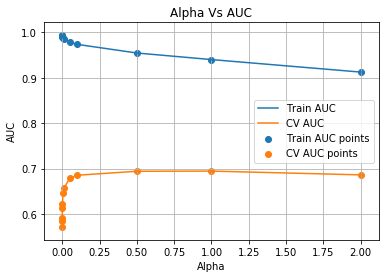

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.354253,0.018642,0.024334,0.000489,1e-05,{'alpha': 1e-05},0.581631,0.562174,0.575653,0.570022,...,0.571314,0.006758,12,0.994202,0.992945,0.993607,0.994019,0.994567,0.993868,0.000556
1,0.393251,0.036805,0.023203,0.007182,5e-05,{'alpha': 5e-05},0.596642,0.573034,0.588320,0.582633,...,0.584516,0.007791,11,0.993294,0.991864,0.992803,0.993092,0.993677,0.992946,0.000611
2,0.380776,0.023384,0.026129,0.001466,0.0001,{'alpha': 0.0001},0.603903,0.579000,0.597476,0.589100,...,0.591668,0.008466,10,0.992698,0.991359,0.992358,0.992631,0.993180,0.992445,0.000604
3,0.387164,0.016847,0.035505,0.013059,0.0005,{'alpha': 0.0005},0.626114,0.597626,0.619394,0.611773,...,0.612596,0.009739,9,0.991130,0.989746,0.990911,0.991107,0.991631,0.990905,0.000626
4,0.368644,0.023358,0.023270,0.003895,0.001,{'alpha': 0.001},0.635008,0.607967,0.626317,0.621980,...,0.621826,0.008965,8,0.990247,0.988837,0.990078,0.990223,0.990722,0.990021,0.000631


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')

plt.plot(alp, cv_auc, label='CV AUC')

plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()

results.head()

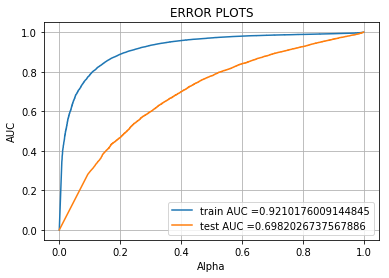

In [83]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=1,class_prior=[0.5,0.5])
nb.fit(X_tr, y_tr)

y_tr_pred = nb.predict_proba(X_tr)[:,1]
y_te_pred = nb.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [84]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print(50*"=")
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(50*"=")
print("Train Accuracy Score")
print(accuracy_score(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test Accuracy Score")
print(accuracy_score(y_te, predict_with_best_t(y_te_pred, best_t)))
print(50*"=")
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test confusion matrix")
print(confusion_matrix(y_te, predict_with_best_t(y_te_pred, best_t)))
print(50*"=")
print("Train F1 Score")
print(f1_score(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test F1 Score")
print(f1_score(y_te, predict_with_best_t(y_te_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.7214979946953071 for threshold 0.854
Train Accuracy Score
0.8499781408820154
Test Accuracy Score
0.7652834794186175
Train confusion matrix
[[ 9405  1678]
 [ 9303 52810]]
Test confusion matrix
[[ 2311  3148]
 [ 5314 25279]]
Train F1 Score
0.9058241352990111
Test F1 Score
0.8566248729244325


# Vectorization of Essays, Project Titles, Resource Summary with Tfidf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(x_tr['ppd_essays'].values) 
x_tr_essay_tfidf = vectorizer.transform(x_tr['ppd_essays'].values)
x_te_essay_tfidf = vectorizer.transform(x_te['ppd_essays'].values)

print("After vectorizations")
print(x_tr_essay_tfidf.shape, y_tr.shape)
print(x_te_essay_tfidf.shape, y_te.shape)

After vectorizations
(73196, 234304) (73196,)
(36052, 234304) (36052,)


In [63]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_tr['ppd_titles'].values)

x_tr_title_tfidf = vectorizer.transform(x_tr['ppd_titles'].values)
x_te_title_tfidf = vectorizer.transform(x_te['ppd_titles'].values)

print("After vectorizations")
print(x_tr_title_tfidf.shape, y_tr.shape)
print(x_te_title_tfidf.shape, y_te.shape)

After vectorizations
(73196, 14112) (73196,)
(36052, 14112) (36052,)


In [64]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_tr['ppd_res_summary'].values)

x_tr_res_summary_tfidf = vectorizer.transform(x_tr['ppd_res_summary'].values)
x_te_res_summary_tfidf = vectorizer.transform(x_te['ppd_res_summary'].values)

print("After vectorizations")
print(x_tr_res_summary_tfidf.shape, y_tr.shape)
print(x_te_res_summary_tfidf.shape, y_te.shape)

After vectorizations
(73196, 18795) (73196,)
(36052, 18795) (36052,)


# Stacking of vectors

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_teacher_id_ohe, x_tr_state_ohe.shape, x_tr_tprefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_teacher_id_ohe, x_te_state_ohe.shape, x_te_tprefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_tr.shape)
print(X_te.shape, y_te.shape)

Final Data matrix
(73196, 320081) (73196,)
(36052, 320081) (36052,)


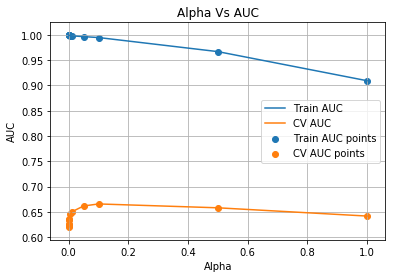

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.381232,0.063918,0.044695,0.003238,1e-05,{'alpha': 1e-05},0.619448,0.625161,0.615744,0.620118,0.003873,11,0.999596,0.999571,0.999623,0.999597,0.000021
1,0.372248,0.028283,0.044999,0.003759,5e-05,{'alpha': 5e-05},0.623851,0.629537,0.620031,0.624473,0.003905,10,0.999511,0.999476,0.999539,0.999509,0.000026
2,0.393010,0.012323,0.053667,0.008225,0.0001,{'alpha': 0.0001},0.626061,0.631745,0.622255,0.626687,0.003899,9,0.999461,0.999422,0.999485,0.999456,0.000026
3,0.431961,0.043965,0.083359,0.033974,0.0005,{'alpha': 0.0005},0.632250,0.637941,0.628518,0.632903,0.003875,8,0.999274,0.999230,0.999296,0.999267,0.000027
4,0.373694,0.014355,0.046900,0.004886,0.001,{'alpha': 0.001},0.635453,0.641205,0.631791,0.636150,0.003874,7,0.999144,0.999099,0.999172,0.999139,0.000030


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(nb, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alp, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()

results.head()

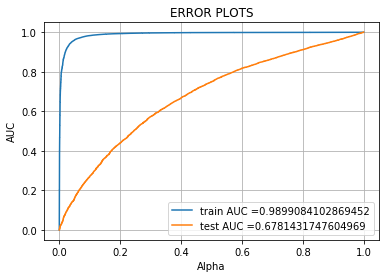

In [89]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.1, class_prior=[0.5,0.5] )
nb.fit(X_tr, y_tr)

y_tr_pred = nb.predict_proba(X_tr)[:,1]
y_te_pred = nb.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(50*"=")
print("Train Accuracy Score")
print(accuracy_score(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test Accuracy Score")
print(accuracy_score(y_te, predict_with_best_t(y_te_pred, best_t)))
print(50*"=")
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test confusion matrix")
print(confusion_matrix(y_te, predict_with_best_t(y_te_pred, best_t)))
print(50*"=")
print("Train F1 Score")
print(f1_score(y_tr, predict_with_best_t(y_tr_pred, best_t)))
print(50*"=")
print("Test F1 Score")
print(f1_score(y_te, predict_with_best_t(y_te_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.9130974682321268 for threshold 0.302
Train Accuracy Score
0.9607355593201814
Test Accuracy Score
0.8007322756019084
Train confusion matrix
[[10509   574]
 [ 2300 59813]]
Test confusion matrix
[[ 1180  4279]
 [ 2905 27688]]
Train F1 Score
0.9765387755102042
Test F1 Score
0.885166240409207
